In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import math
import time
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.stats import norm

from sklearn.ensemble import RandomForestRegressor   
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from SimulatedAnnealing import SimulatedAny
from BayersOptimlization import Bayes_Optimalizator

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor  

import warnings
warnings.filterwarnings("ignore")

## Data Description and preprocessing

In [3]:
pd_data = pd.read_csv('Daily_Demand_Forecasting_Orders.csv')

In [4]:
pd_data.shape

(60, 4)

In [5]:
pd_data.head(10)

,Week of the month (first week,second,third,fourth or fifth week;Day of the week (Monday to Friday);Non-urgent order;Urgent order;Order type A;Order type B;Order type C;Fiscal sector orders;Orders from the traffic controller sector;Banking orders (1);Banking orders (2);Banking orders (3);Target (Total orders)
0,1;4;316.307;223.270;61.543;175.586;302.448;0;6...,NaN,NaN,NaN
1,1;5;128.633;96.042;38.058;56.037;130.580;0;404...,NaN,NaN,NaN
2,1;6;43.651;84.375;21.826;25.125;82.461;1.386;1...,NaN,NaN,NaN
3,2;2;171.297;127.667;41.542;113.294;162.284;18....,NaN,NaN,NaN
4,2;3;90.532;113.526;37.679;56.618;116.220;6.459...,NaN,NaN,NaN
5,2;4;110.925;96.360;30.792;50.704;125.868;79;52...,NaN,NaN,NaN
6,2;5;144.124;118.919;43.304;66.371;153.368;0;46...,NaN,NaN,NaN
7,2;6;119.379;113.870;38.584;85.961;124.413;15.7...,NaN,NaN,NaN
8,3;2;218.856;124.381;33.973;148.274;162.044;1.0...,NaN,NaN,NaN
9,3;3;146.518;101.045;36.399;43.306;168.723;865;...,NaN,NaN,NaN


In [9]:
pd_data.columns

Index(['Week of the month (first week', ' second', ' third',
       ' fourth or fifth week;Day of the week (Monday to Friday);Non-urgent order;Urgent order;Order type A;Order type B;Order type C;Fiscal sector orders;Orders from the traffic controller sector;Banking orders (1);Banking orders (2);Banking orders (3);Target (Total orders)'],
      dtype='object')

In [10]:
cols = [1,2,3]
pd_data.drop(pd_data.columns[cols],axis=1,inplace=True)

In [11]:
pd_data.head(2)

,Week of the month (first week
0,1;4;316.307;223.270;61.543;175.586;302.448;0;6...
1,1;5;128.633;96.042;38.058;56.037;130.580;0;404...


In [12]:
pd_data[['week of the month','day of the week','non-urgent order','urgent order','order type A','order type B','order type C','fiscal sector orders','orders from traffic controller sector','banking orders 1','banking orders 2','banking orders 3','Target(total orders)']] = pd_data['Week of the month (first week'].str.split(";",expand=True,)
pd_data.drop(pd_data.columns[0],axis=1,inplace=True)

In [13]:
pd_data.head(4)


,week of the month,day of the week,non-urgent order,urgent order,order type A,order type B,order type C,fiscal sector orders,orders from traffic controller sector,banking orders 1,banking orders 2,banking orders 3,Target(total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120


In [14]:
pd_data.info() # seems like there are no missing values but the attributes are object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   week of the month                      60 non-null     object
 1   day of the week                        60 non-null     object
 2   non-urgent order                       60 non-null     object
 3   urgent order                           60 non-null     object
 4   order type A                           60 non-null     object
 5   order type B                           60 non-null     object
 6   order type C                           60 non-null     object
 7   fiscal sector orders                   60 non-null     object
 8   orders from traffic controller sector  60 non-null     object
 9   banking orders 1                       60 non-null     object
 10  banking orders 2                       60 non-null     object
 11  banking orders 3     

In [15]:
# changing the attribute types into numeric 
pd_data['week of the month']=pd.to_numeric(pd_data['week of the month'])
pd_data['day of the week']=pd.to_numeric(pd_data['day of the week'])
pd_data['non-urgent order']=pd.to_numeric(pd_data['non-urgent order'])
pd_data['urgent order']=pd.to_numeric(pd_data['urgent order'])
pd_data['order type A']=pd.to_numeric(pd_data['order type A'])
pd_data['order type B']=pd.to_numeric(pd_data['order type B'])
pd_data['order type C']=pd.to_numeric(pd_data['order type C'])
pd_data['fiscal sector orders']=pd.to_numeric(pd_data['fiscal sector orders'])
pd_data['orders from traffic controller sector']=pd.to_numeric(pd_data['orders from traffic controller sector'])
pd_data['banking orders 1']=pd.to_numeric(pd_data['banking orders 1'])
pd_data['banking orders 2']=pd.to_numeric(pd_data['banking orders 2'])
pd_data['banking orders 3']=pd.to_numeric(pd_data['banking orders 3'])
pd_data['Target(total orders)']=pd.to_numeric(pd_data['Target(total orders)'])

In [16]:
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   week of the month                      60 non-null     int64  
 1   day of the week                        60 non-null     int64  
 2   non-urgent order                       60 non-null     float64
 3   urgent order                           60 non-null     float64
 4   order type A                           60 non-null     float64
 5   order type B                           60 non-null     float64
 6   order type C                           60 non-null     float64
 7   fiscal sector orders                   60 non-null     float64
 8   orders from traffic controller sector  60 non-null     int64  
 9   banking orders 1                       60 non-null     int64  
 10  banking orders 2                       60 non-null     int64  
 11  banking 

## visualizing the unique values in attributes

array([[<AxesSubplot:title={'center':'week of the month'}>,
        <AxesSubplot:title={'center':'day of the week'}>,
        <AxesSubplot:title={'center':'non-urgent order'}>,
        <AxesSubplot:title={'center':'urgent order'}>],
       [<AxesSubplot:title={'center':'order type A'}>,
        <AxesSubplot:title={'center':'order type B'}>,
        <AxesSubplot:title={'center':'order type C'}>,
        <AxesSubplot:title={'center':'fiscal sector orders'}>],
       [<AxesSubplot:title={'center':'orders from traffic controller sector'}>,
        <AxesSubplot:title={'center':'banking orders 1'}>,
        <AxesSubplot:title={'center':'banking orders 2'}>,
        <AxesSubplot:title={'center':'banking orders 3'}>],
       [<AxesSubplot:title={'center':'Target(total orders)'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

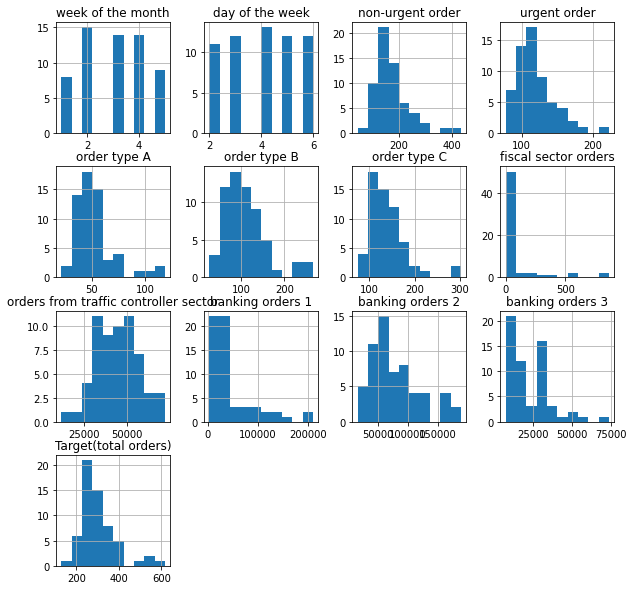

In [17]:
pd_data.hist(figsize=(10,10)) 

## Visualizing correlation matrix

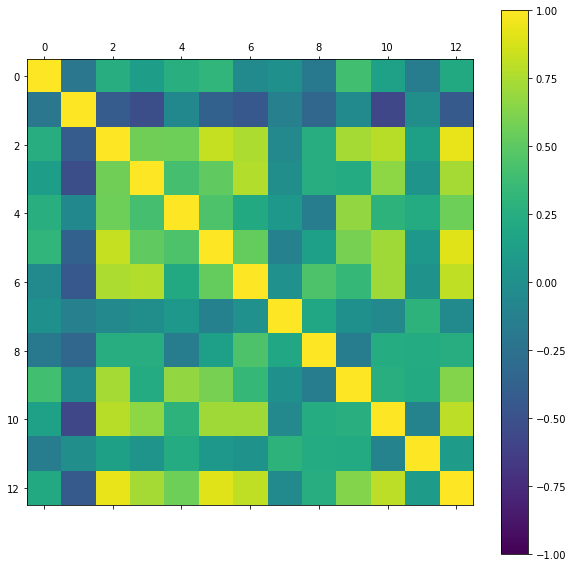

In [18]:
correlations = pd_data.corr()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

## Heatmap

In [1]:
import seaborn as sns

In [ ]:
plt.figure(figsize=(18,12))
sns.heatmap(pd_data.corr(), annot=True)
plt.xticks(rotation=90)
plt.show()

## Splitting into train and test

In [19]:
pd_data_X = pd_data[pd_data.columns[0:-2]]
pd_data_Y = pd_data[pd_data.columns[-1]]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(pd_data_X, pd_data_Y,
                                                    train_size=0.85, test_size=0.15, random_state=42)

In [26]:
scaler = StandardScaler()
scaler.fit(pd_data_X)
X_train_s = pd.DataFrame(scaler.fit_transform(pd_data_X),columns = pd_data_X.columns)

X_test_s = pd.DataFrame(scaler.fit_transform(X_test),columns = X_test.columns)

# MODELS

### Search space

In [ ]:
SVR_parameters_ranges = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 
                         'C': [0.00001,0.0001,0.001,0.01,0.1,1], 'gamma': ['scale','auto']}

RFR_parameters_ranges = {'max_depth': np.arange(1,250), 'n_estimators': np.arange(1,250), 
                    'criterion': ['mae','mse'], 'max_features' : ["sqrt","log2"]}

KNNR_parameters_ranges = {'n_neighbors':np.arange(1,40), 'weights' : ['uniform', 'distance'], 
                          'algorithm': ['ball_tree', 'kd_tree', 'brute'],'leaf_size': np.arange(1,50),
                         'metric' : ['euclidean', 'manhattan', 'minkowski']}

### Objective functions

In [21]:
def objective_function_random_forest(parameters,pd_train_data_X, pd_train_data_Y):

    Forest_regre = RandomForestRegressor(**parameters, random_state=0)
    scores = cross_val_score(Forest_regre, pd_train_data_X, pd_train_data_Y.values.ravel(), cv=5,scoring='neg_root_mean_squared_error')
    return scores.mean()

def objective_function_SVC(parameters,pd_train_data_X, pd_train_data_Y):
    sv = SVR(**parameters)
    scores = cross_val_score(sv, pd_train_data_X, pd_train_data_Y.values.ravel(), cv=5,scoring='neg_root_mean_squared_error')
    return scores.mean()

def objective_function_KNN(parameters,pd_train_data_X, pd_train_data_Y):
    knn_clas = KNeighborsRegressor(**parameters)
    scores = cross_val_score(knn_clas, pd_train_data_X, pd_train_data_Y.values.ravel(), cv=5,scoring='neg_root_mean_squared_error')
    return scores.mean()


### Bayesian optimalization extra 

In [22]:
def acquisition_Function(random_param,real_X,real_Y,surrogate):
    #get the best parameters so far
    score_pred = surrogate.predict(real_X)
    best = max(real_Y)

            
    #predict accurcy 
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        mu, std = surrogate.predict(random_param, return_std=True)
  
        mu = mu[:, 0]
    
        probs = norm.cdf((mu - best) / (std))
    
    ix = np.argmax(probs)
    
    return random_param[ix]

pr_model = GaussianProcessRegressor(random_state=0)

## Optimization

In [23]:
best_candidates_SA = []
best_scores_SA = []
best_metro_SA = []
times_SA = []

best_SA = []

best_candidates_Bay = []
best_score_Bay = []
times_Bay = []

best_Bay = []


In [27]:
Train_scaled_X = X_train_s 
Test_scaled_X = X_test_s
y_train = y_train
y_test= y_test

In [ ]:
for callss in range(20):
    SAs = [SimulatedAny(objective_function_random_forest,RFR_parameters_ranges),
       SimulatedAny(objective_function_SVC, SVR_parameters_ranges),
       SimulatedAny(objective_function_KNN,KNNR_parameters_ranges)]

    Bays = [Bayes_Optimalizator(objective_function_random_forest,pr_model,acquisition_Function,RFR_parameters_ranges),
            Bayes_Optimalizator(objective_function_SVC,pr_model,acquisition_Function,SVR_parameters_ranges),
            Bayes_Optimalizator(objective_function_KNN,pr_model,acquisition_Function,KNNR_parameters_ranges)]
    

    ids = 1

    for id_x,x in enumerate(SAs):
        st_time = time.time()
        scor,candi,metro = x.run(100,5,100,Train_scaled_X,y_train)
        so_time = time.time()

        all_t = so_time - st_time
        times_SA.append(all_t)

        best_candidates_SA.append(candi[-1])
        best_SA.append(scor[-1])
        best_scores_SA.append(scor)
        best_metro_SA.append(metro)

        plt.figure()
        plt.plot(best_scores_SA[-1])
        plt.xlabel('Iterations')
        plt.ylabel('n-RMSe')
        plt.grid()
        mod = ['SA-RFR','SA-SVR','SA-KNN']
        plt.title('{}__TIME-{}__BEST-SCORE-{}\n{}'.format(mod[id_x],times_SA[-1],best_SA[-1],best_candidates_SA[-1]))
        plt.savefig('{}-call_{}.Model_{}_score={}_time{}.png'.format(callss,ids,mod[id_x],best_SA[-1],times_SA[-1])) 
        ids += 1




    for id_x,x in enumerate(Bays):
        st_time = time.time()
        score,par,best = x.optimaze(100,Train_scaled_X,y_train)
        so_time = time.time()

        all_t = so_time - st_time
        times_Bay.append(all_t)

        best_candidates_Bay.append(par[-1])
        best_score_Bay.append(best)    

        best_Bay.append(best[-1])

        plt.figure()
        plt.plot(best_score_Bay[-1])
        plt.xlabel('Iterations')
        plt.ylabel('n-RMSe')
        plt.grid()
        mod = ['Bay-RFR','BA-SVR','BA-KNN']
        plt.title('{}__TIME-{}__BEST-SCORE-{}\n{}'.format(mod[id_x],times_Bay[-1],best_Bay[-1],best_candidates_Bay[-1]))
        plt.savefig('{}-call_{}.Model_{}_score={}_time{}.png'.format(callss,ids,mod[id_x],best_Bay[-1],times_Bay[-1]))
        ids += 1            



## Evaluation

In [ ]:
select_SA_BEST = np.argmax(best_SA)
select_BA_BEST = np.argmax(best_Bay)

model = 0
param = 0

if best_SA[select_SA_BEST] > best_Bay[select_BA_BEST]:
    model = select_SA_BEST
    param = best_candidates_SA[select_SA_BEST]
else:
    model = select_BA_BEST
    param =  best_candidates_Bay[select_BA_BEST]

In [29]:
def evaluate_best(id_mod, pd_train_X,pd_train_Y,pd_test_X,pd_test_Y,parameters):
    if id_mod == 0:
        model = RandomForestRegressor(**parameters, random_state=0)
    elif id_mod == 1:
        model = SVR(**parameters)
    elif id_mod == 2:
        model =KNeighborsRegressor(**parameters)
        
    res = model.fit(pd_train_X,pd_train_Y.values.ravel())
    
    pred = res.predict(pd_test_X)
    
    return -np.sqrt(mean_squared_error(pd_test_Y.values.ravel(),pred))

In [36]:
param = {'kernel': 'linear', 'C': 1, 'gamma': 'scale' }

In [37]:
print(evaluate_best(1,Train_scaled_X,y_train,Test_scaled_X,y_test,param))

-75.86669061617035
